# Top2Vec Topic Modelling on Bloomberg News Articles 2006 - 2010
Load the bloomberg news articles data.

In [1]:
import pandas as pd
import os
import re
from datetime import datetime
from tqdm import tqdm
from top2vec import Top2Vec

def list_files(dir):
    text = []
    dates = []
    for root, dirs, files in tqdm(os.walk(dir)):
        for name in files:
            #print(name)
            match = re.search(r"\d{4}-\d{2}-\d{2}", root)
            if match != None:
                date = datetime.strptime(match.group(), "%Y-%m-%d").date()
                txtfile = open(os.path.join(root, name), "r")
                data = txtfile.read()
                txtfile.close()
                #text.append((date, str))
                text.append(data)
                dates.append(date)
    return text, dates

text, dates = list_files("./data")
len(text)

896it [00:02, 397.88it/s]


61177

In [2]:
text[0]

"-- Goodyear Among Founders of Michigan Auto Trade Group\n-- Mike Ramsey\n-- 2007-01-04T22:32:31Z\n-- http://www.bloomberg.com/news/2007-01-04/goodyear-among-founders-of-michigan-auto-trade-group-update1-.html\n\n          \n          \n             Goodyear Tire & Rubber Co. (GT)  and three\nother companies that do business with Michigan-based carmakers\nand auto-parts suppliers have formed a trade group to promote the\nstate's ailing automotive industry.  \n The founders of MICHauto want to revive a sector battered by\njob cuts and factory shutdowns, especially at General Motors\nCorp. and Ford Motor Co. The industry's woes have contributed to\nMichigan's 6.9 percent  unemployment rate , the second worst among\nstates and more than 50 percent higher than the national rate.  \n Michigan lost 101,000 automotive manufacturing jobs between\n2001 and 2006, a 32 percent drop. Meanwhile, Southern states have\nincreased  auto-industry  employment over the past 15 years by\nluring new factori

Remove emails, white-spaces, urls and other oddities.

In [3]:
text_clean = [re.sub(r'http\S+', '', t) for t in text]
text_clean= [t.strip().replace('\n', ' ') for t in text_clean]
docs = [re.sub(r'[\w\.-]+@[\w\.-]+', '', t) for t in text_clean]
docs = [t.strip().replace('`', ' ') for t in docs]
docs = [t.strip().replace('--', ' ') for t in docs]

In [4]:
docs[0]

"  Goodyear Among Founders of Michigan Auto Trade Group   Mike Ramsey   2007-01-04T22:32:31Z                                        Goodyear Tire & Rubber Co. (GT)  and three other companies that do business with Michigan-based carmakers and auto-parts suppliers have formed a trade group to promote the state's ailing automotive industry.    The founders of MICHauto want to revive a sector battered by job cuts and factory shutdowns, especially at General Motors Corp. and Ford Motor Co. The industry's woes have contributed to Michigan's 6.9 percent  unemployment rate , the second worst among states and more than 50 percent higher than the national rate.    Michigan lost 101,000 automotive manufacturing jobs between 2001 and 2006, a 32 percent drop. Meanwhile, Southern states have increased  auto-industry  employment over the past 15 years by luring new factories from Toyota Motor Corp., Bayerische Motoren Werke AG and  Nissan Motor Co. (NSANY) , among others.      We need somebody   an o

## Train the bigram model by looking at the corpus
I wanted to have bigrams like "carbon credits", etc

In [5]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

sentence_stream = [doc.split(" ") for doc in docs]
bigram = Phrases(sentence_stream, min_count=5, threshold=100, delimiter=b' ')
bigram_phraser = Phraser(bigram)


In [6]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags

# Default - top2vec uses this
# def default_tokenizer(doc):
#    """Tokenize documents for training and remove too long/short words"""
#    return simple_preprocess(strip_tags(doc), deacc=True)

def bigrammer(doc):
    #sentence_stream = doc.split(" ")
    sentence_stream = simple_preprocess(strip_tags(doc), deacc=True)
    return bigram_phraser[sentence_stream]

## Train the top2vec model.
Make sure you have a computer with lots of ram to run this if you're working with a lot of text. I ran it on a desktop with 32G of ram. 

In [7]:
model = Top2Vec.load("top2vec_bloomberg_2.0_docs_bigrams_deeplearn")
#model = Top2Vec(documents=docs, speed="deep-learn", tokenizer=bigrammer, workers=8) # pass in bigrammer in place of default_tokenizer, warning, deep-learn takes a long time


Save the model for future use. 

In [224]:
model.save("top2vec_bloomberg_2.0_docs_bigrams_deeplearn")

In [225]:
print("Model saved!")

Model saved!


In [11]:
model.get_num_topics()

640

## Get everything about the topics

In [14]:
topic_words, word_scores, topic_nums = model.get_topics(640)

In [15]:
topic_words

array([['shaji', 'dubai', 'dirhams', ..., 'vivian', 'gcc', 'sultan'],
       ['warsaw', 'zloty', 'polish', ..., 'pl', 'jaroslaw', 'rostowski'],
       ['patients', 'clinical trials', 'side effects', ..., 'alzheimer',
        'chronic', 'hormone'],
       ...,
       ['parkway', 'khazanah', 'fortis', ..., 'netty', 'goh', 'nursing'],
       ['carrefour', 'lotte', 'tesco', ..., 'uniqlo', 'southeast',
        'convenience'],
       ['hobbit', 'rings', 'actors', ..., 'twilight', 'eclipse',
        'goldwyn']], dtype='<U25')

In [117]:
topic_sizes, topic_nums = model.get_topic_sizes()

## Let's search for carbon credits, was anyone talking about this from 2006 to 2010?

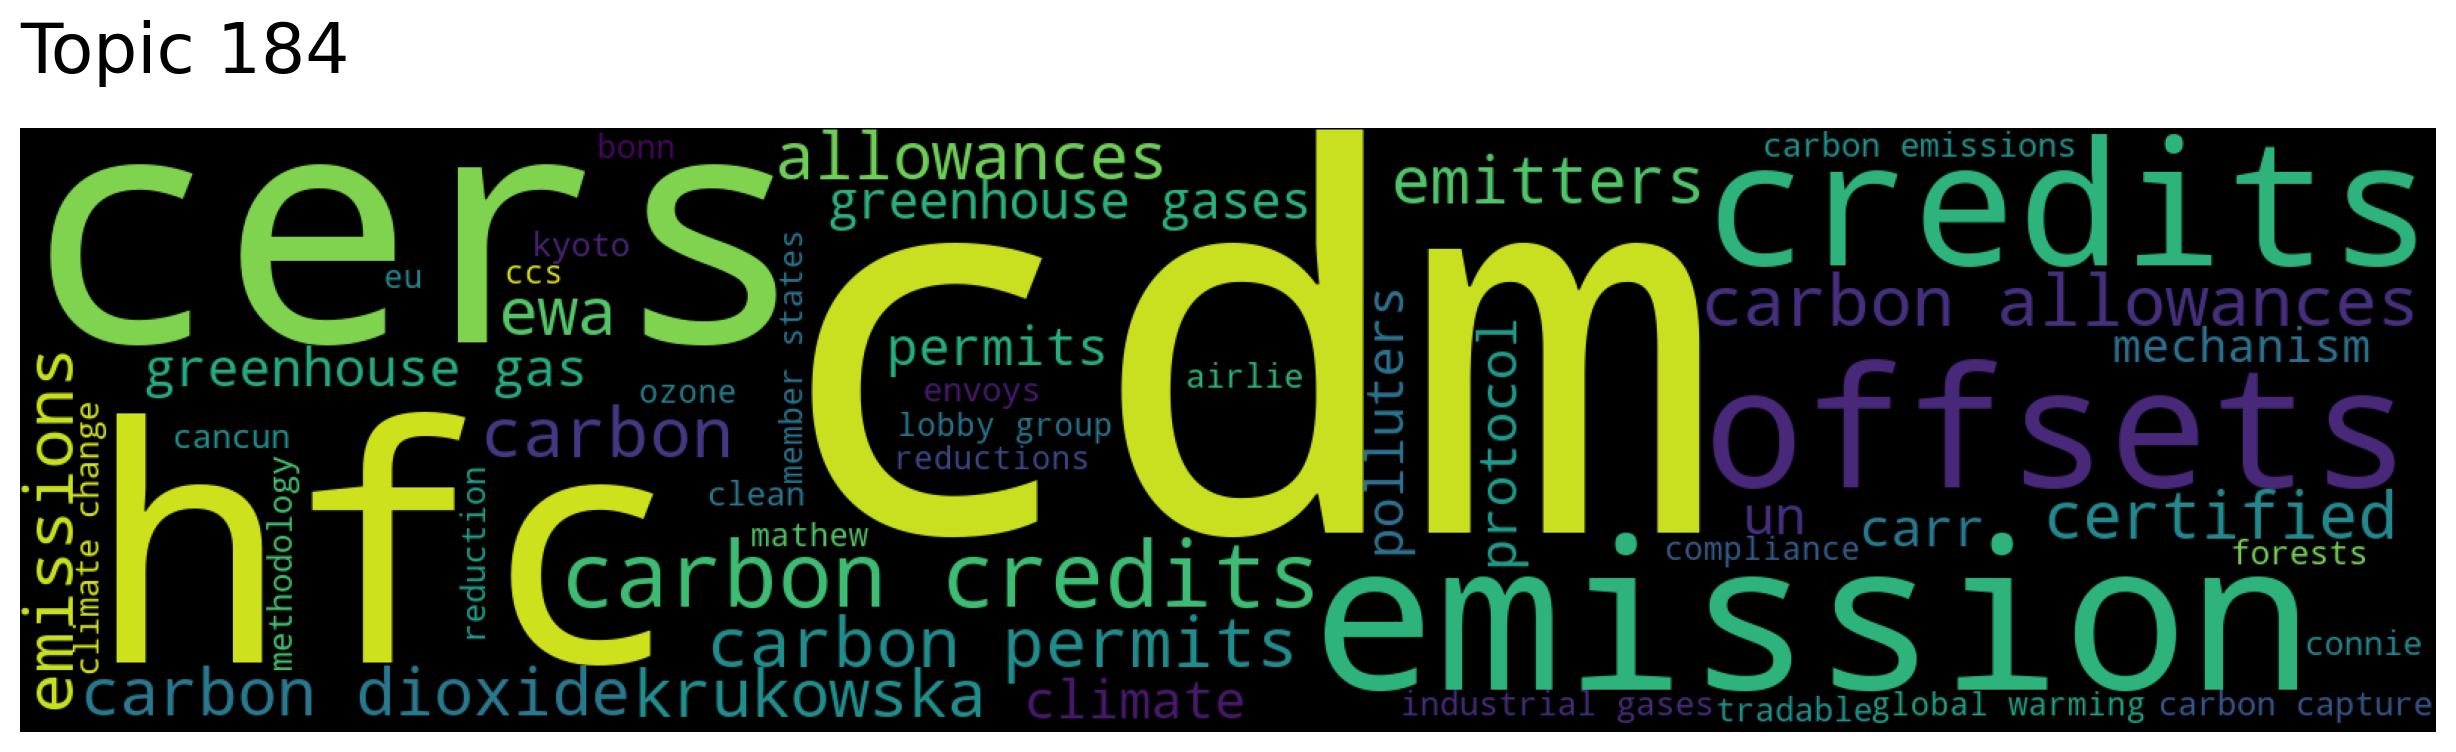

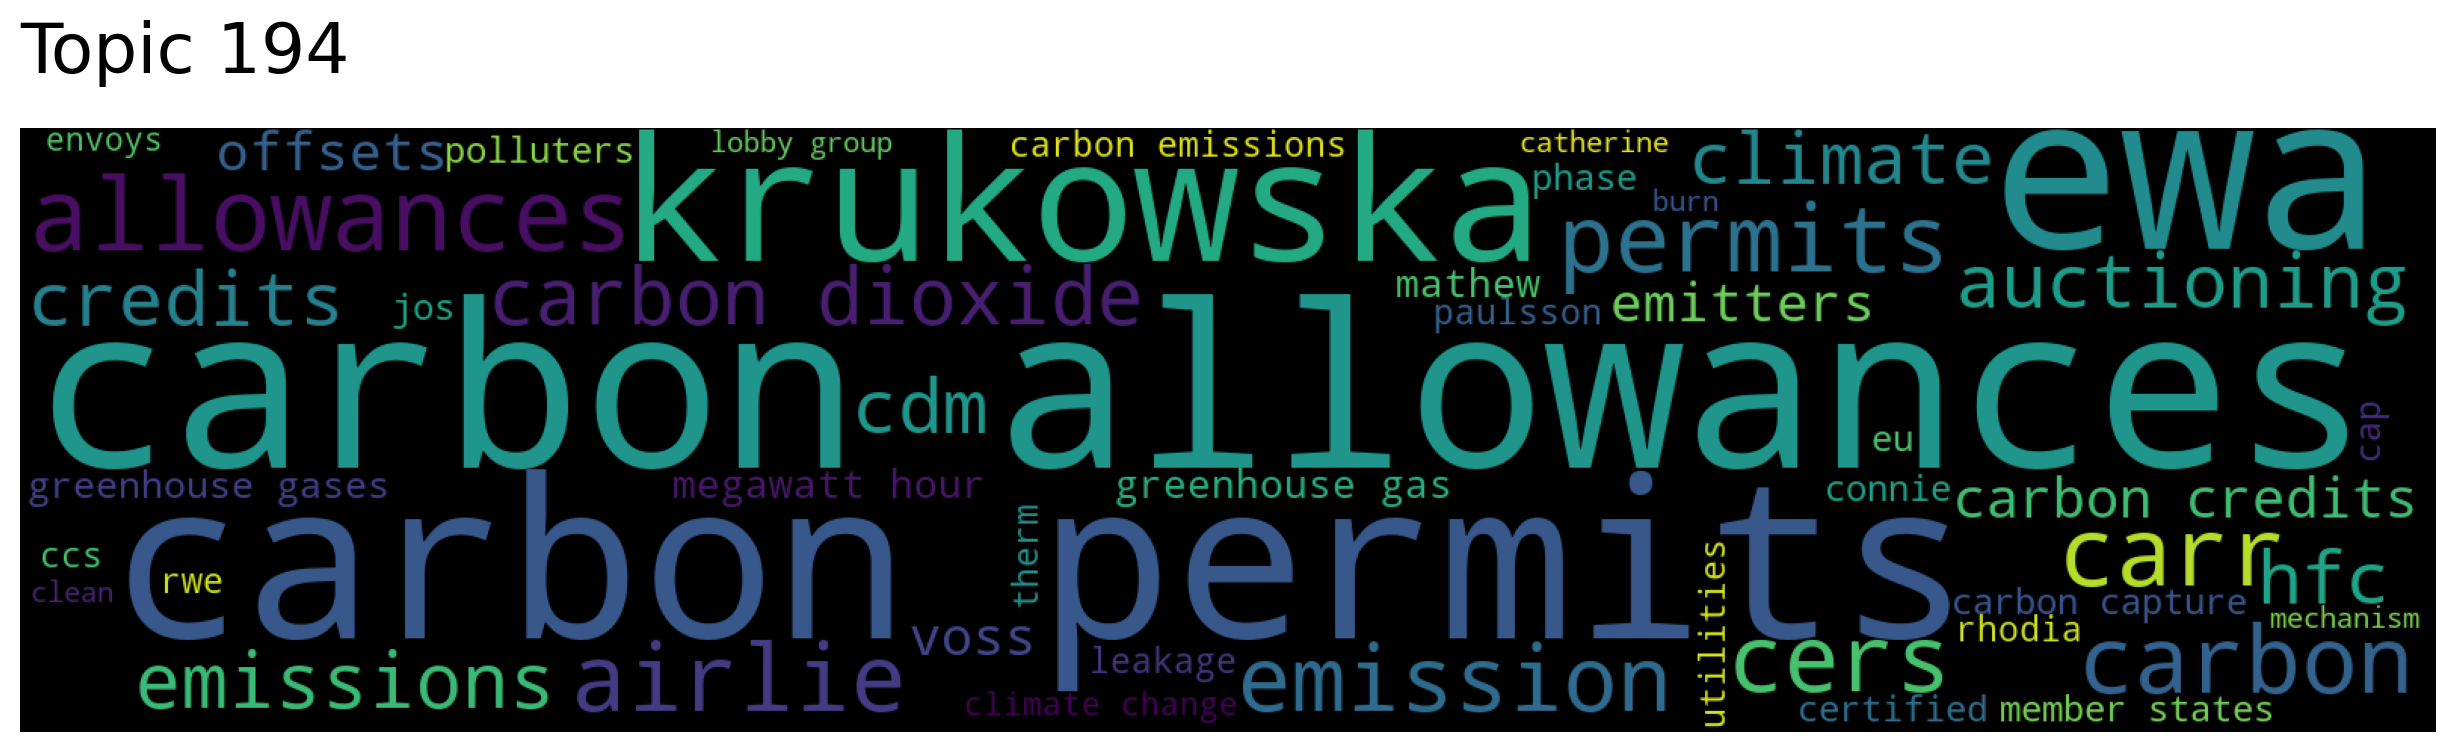

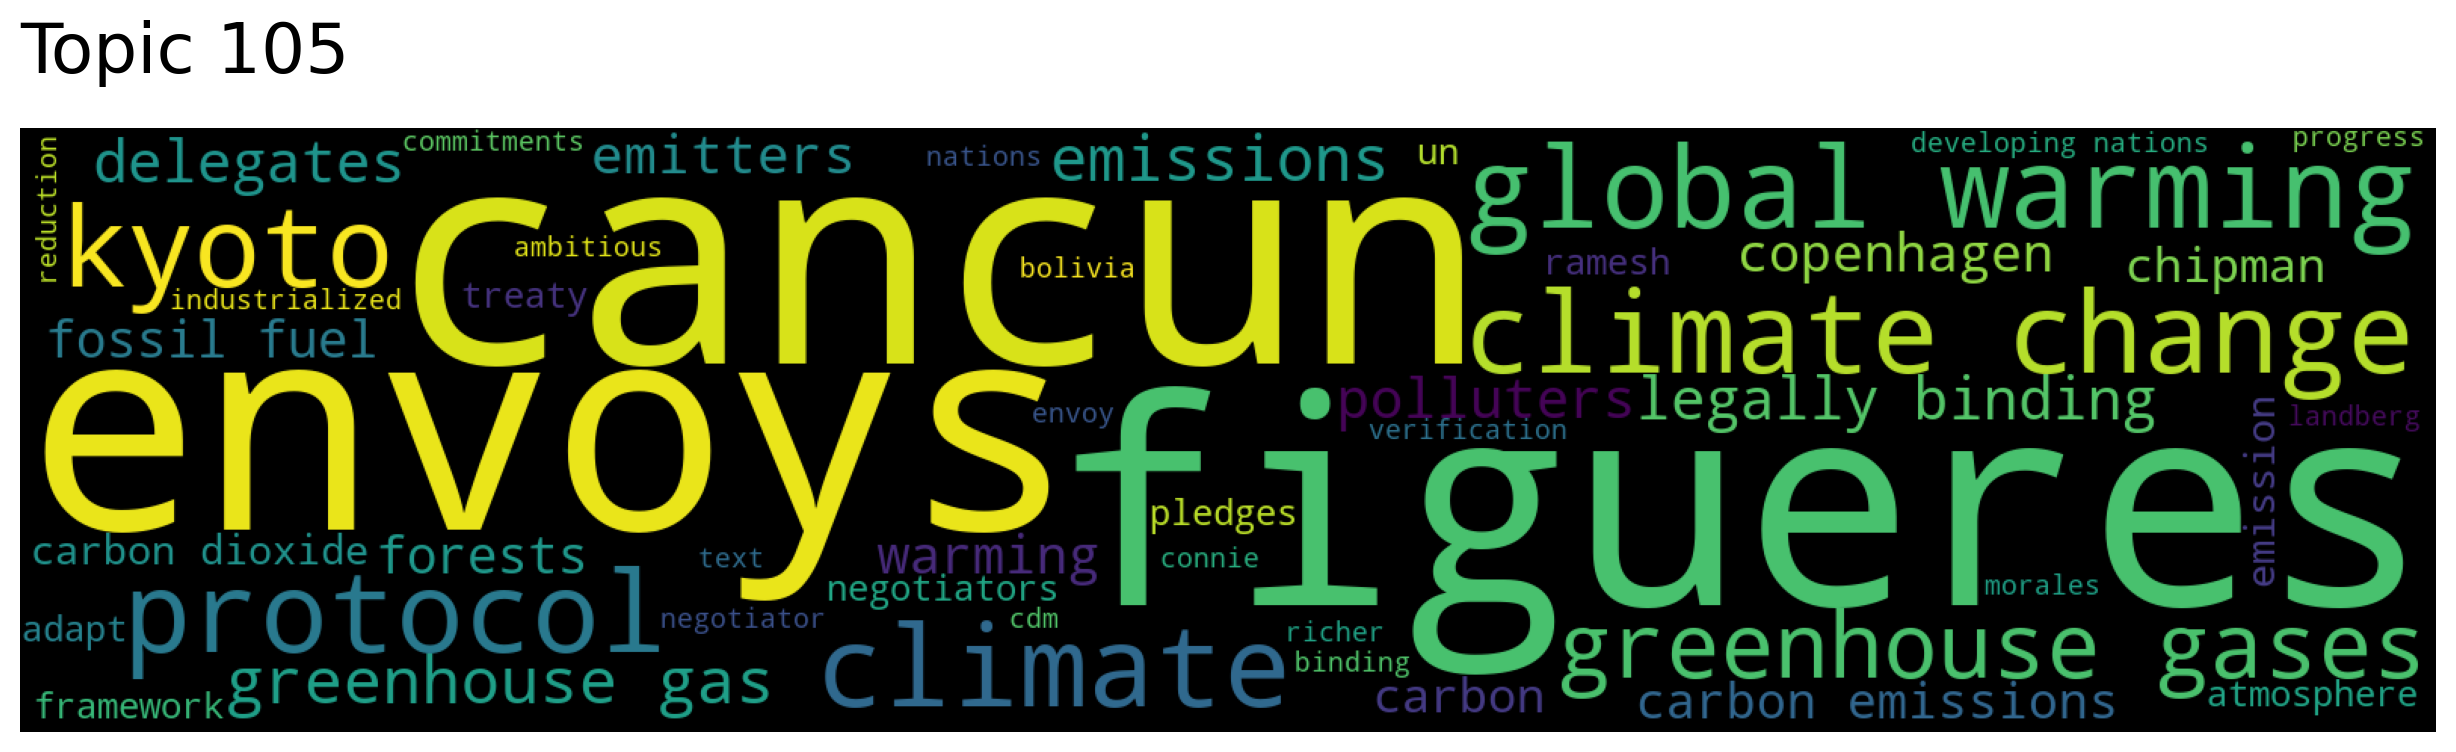

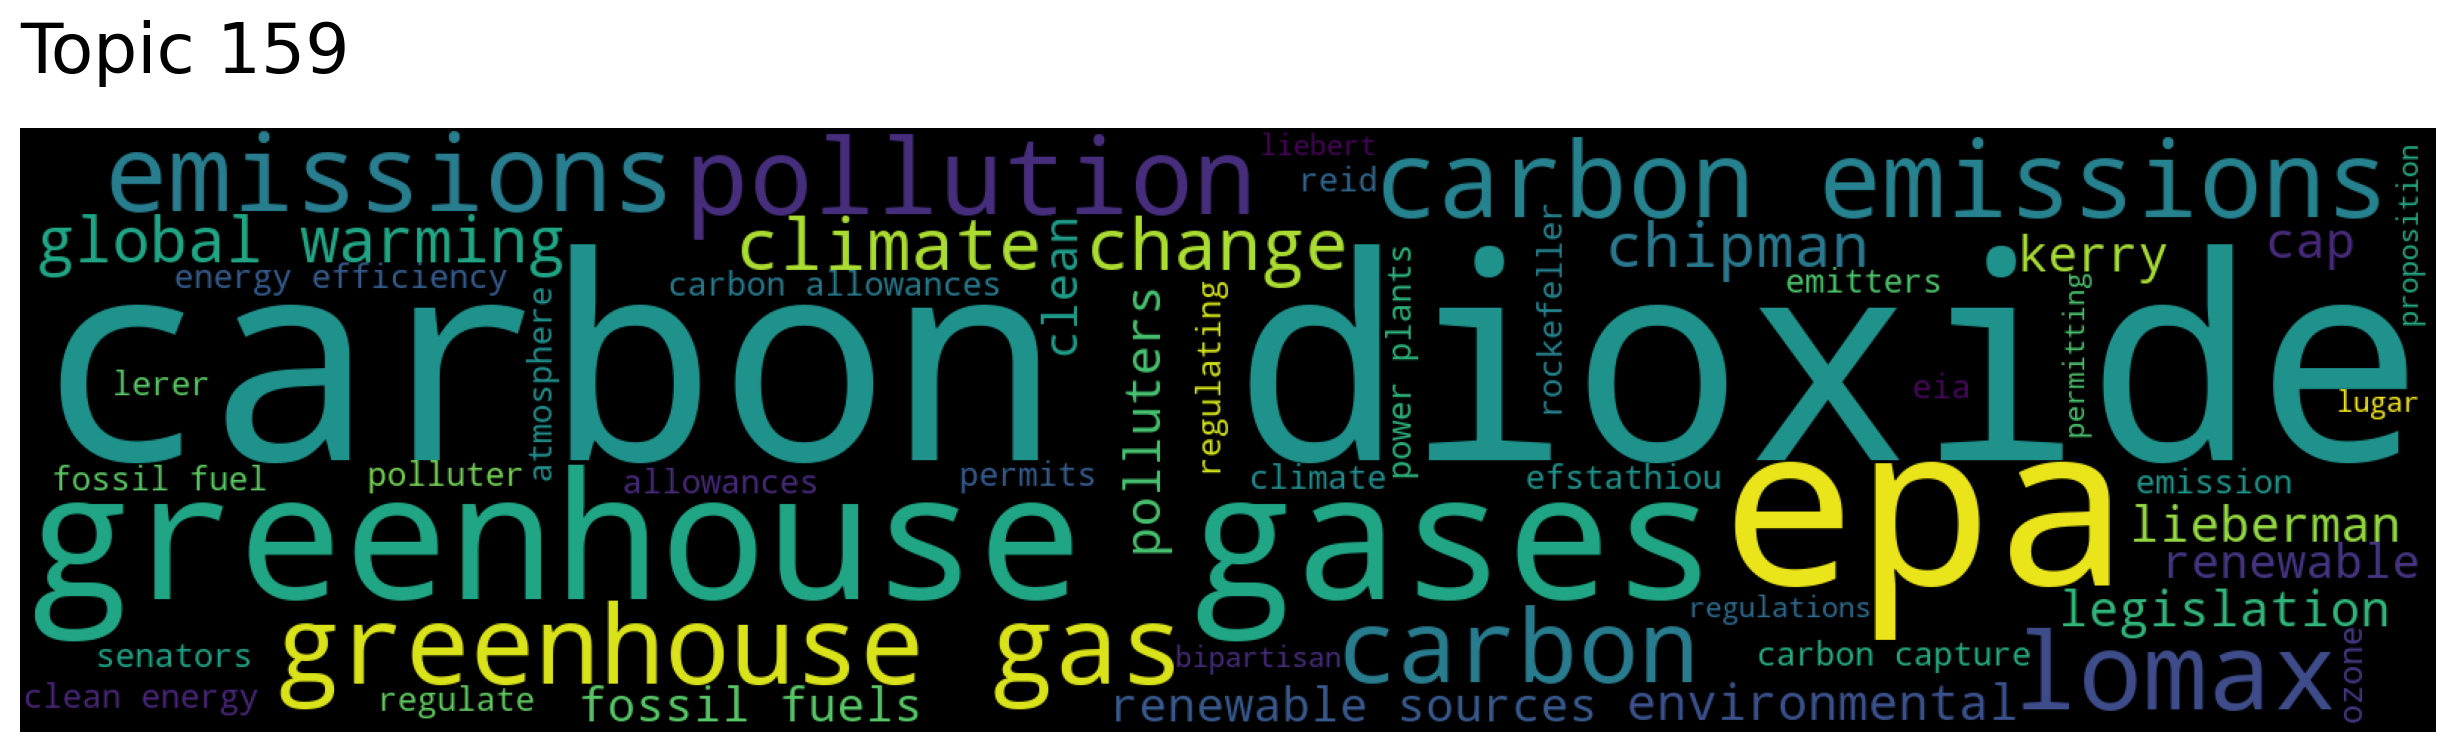

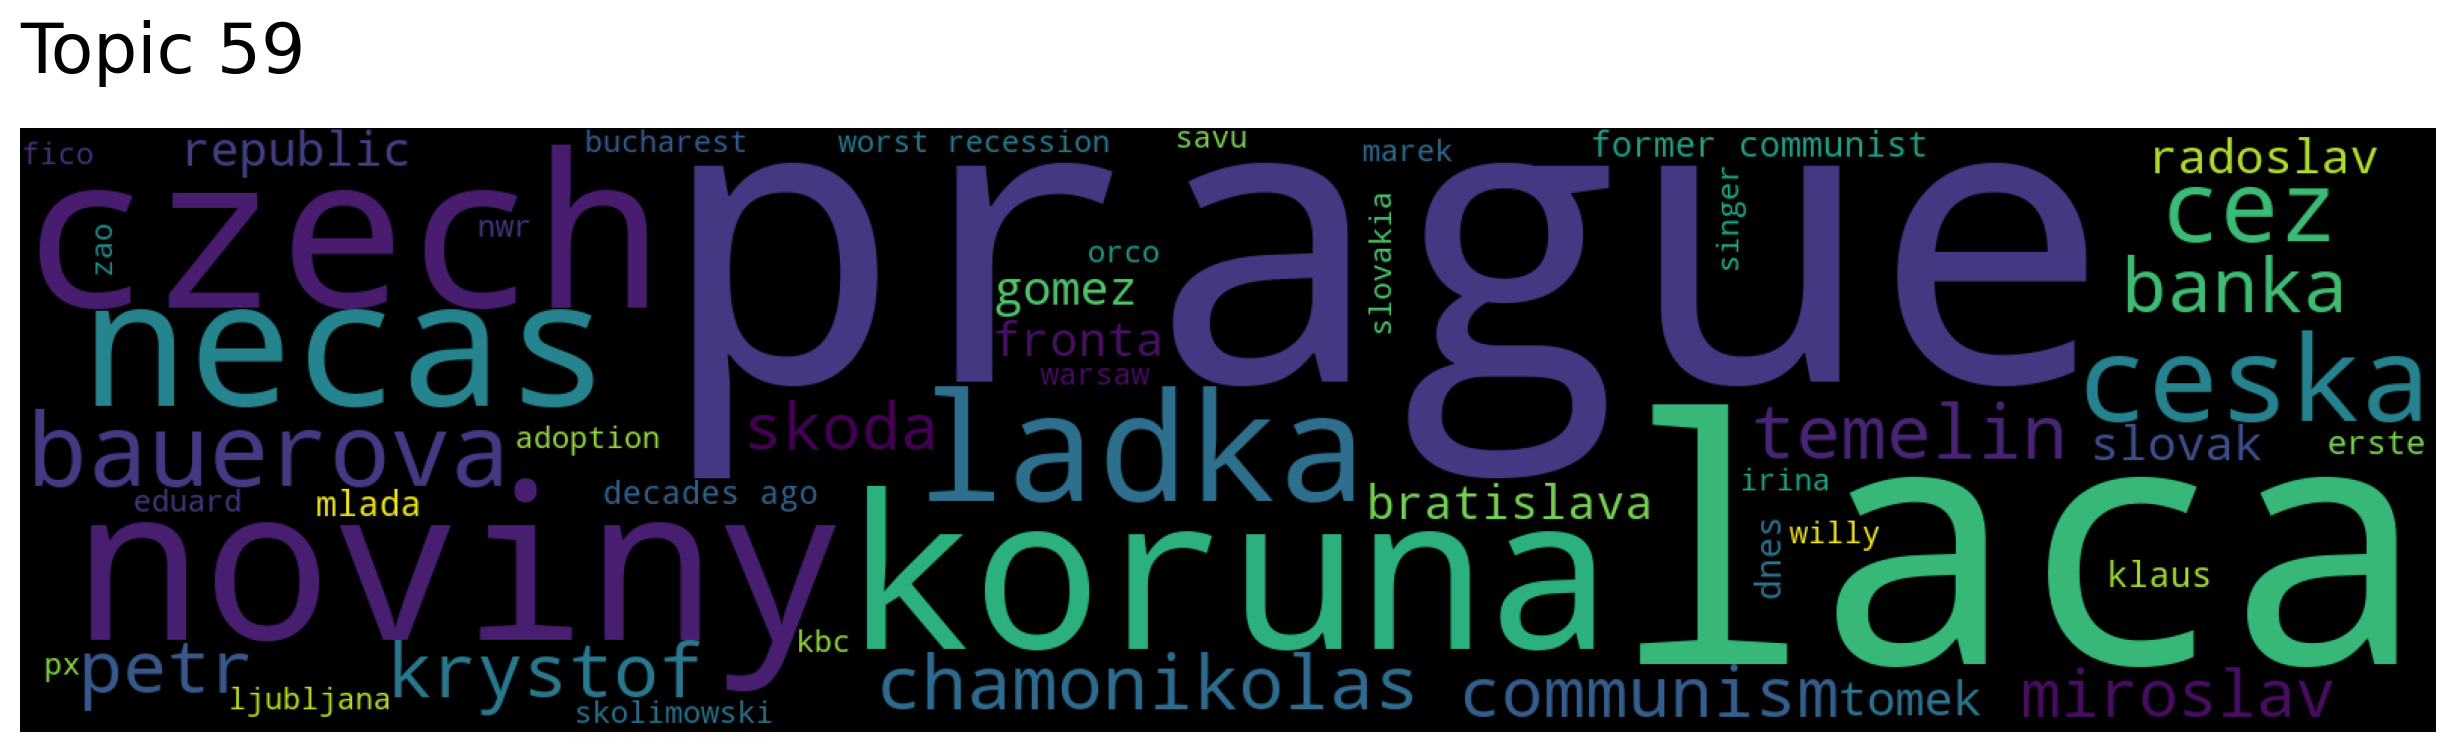

In [16]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["carbon credits"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

Topic 184 looks interesting, let's see the documents

In [17]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=184, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 51858, Score: 0.8001534342765808
-----------
  India, China to Lobby UN Against Changing Carbon-Emission Rules   B y   D i n a k a r   S e t h u r a m a n   2010-10-28T05:32:37Z    China and India are working together in an effort to persuade the United Nations not to restrict access to the world’s biggest source of UN-certified emission- reduction credits, an official said.  “We are cooperating with India to push the UN to get business back as usual,” Huan Chen, deputy director general at China Clean Development Mechanism Fund, said in an interview at the Carbon Forum Asia 2010 conference in Singapore today. The fund is under China’s Ministry of Finance. HFC credits and industrial gases have made up more than 70 percent of the total CDM supply since 2005, and are largely generated by plants in China and India, according to data from Barclays Capital.  The United Nations and the European Union have said they may issue new rules on the methodology of issuance and acceptance of

We can also directly search the document using keywords, let's try greenhouse gases

In [18]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["greenhouse gases"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 59965, Score: 0.6154510974884033
-----------
  UN's Talks in China on Climate Change Show Little Progress, Bolivia Says   B y   S t u a r t   B i g g s   2010-10-06T05:49:23Z    United Nations talks in China aimed at reaching an agreement to mitigate climate change are making little progress, according to  Pablo Solon , the head of Bolivia’s delegation to the meeting.  Delegations are avoiding discussion over the content of the negotiating text by introducing new proposals, while there’s been no movement on the “insufficient” pledges by developed countries to reduce their greenhouse gas emissions,  Solon , Bolivia’s Ambassador to the UN, said today.  Officials from 177 governments are meeting in Tianjin, China to move forward on a climate treaty for when emissions targets set by the  Kyoto Protocol  expire at the end of 2012. Talks in Copenhagen broke down last year over issues including setting a global emissions reduction target and Solon said little progress is possible un

They were talking about it 10 years ago! We're still talking about it... 

## Inspect one of the documents

In [41]:
doc_topics = model.get_documents_topics([51858])
doc_topics


(array([184]),
 array([0.80015343], dtype=float32),
 array([['cdm', 'cers', 'hfc', 'emission', 'credits', 'offsets',
         'carbon credits', 'carbon allowances', 'carbon',
         'carbon permits', 'emissions', 'allowances', 'certified', 'ewa',
         'emitters', 'krukowska', 'carbon dioxide', 'greenhouse gas',
         'carr', 'un', 'climate', 'permits', 'protocol',
         'greenhouse gases', 'polluters', 'mechanism', 'industrial gases',
         'envoys', 'airlie', 'cancun', 'kyoto', 'methodology',
         'carbon capture', 'clean', 'connie', 'climate change', 'bonn',
         'carbon emissions', 'tradable', 'reduction', 'forests',
         'global warming', 'lobby group', 'mathew', 'ozone', 'ccs',
         'compliance', 'eu', 'reductions', 'member states']], dtype='<U25'),
 array([[0.859843  , 0.8422411 , 0.8387831 , 0.8315415 , 0.82108843,
         0.7599192 , 0.7576663 , 0.7380395 , 0.7068457 , 0.7047249 ,
         0.68863285, 0.6564978 , 0.64285123, 0.6402796 , 0.6328994

In [42]:
topic_names = doc_topics[2]
topic_probs = doc_topics[3]
df_topics = pd.DataFrame(topic_names).transpose().rename(columns={0 : "Topics"})
df_probs = pd.DataFrame(topic_probs).transpose().rename(columns={0 : "Probability"})
df = pd.concat([df_topics, df_probs], axis=1)

In [43]:
#!pip install seaborn

In [44]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,12)})

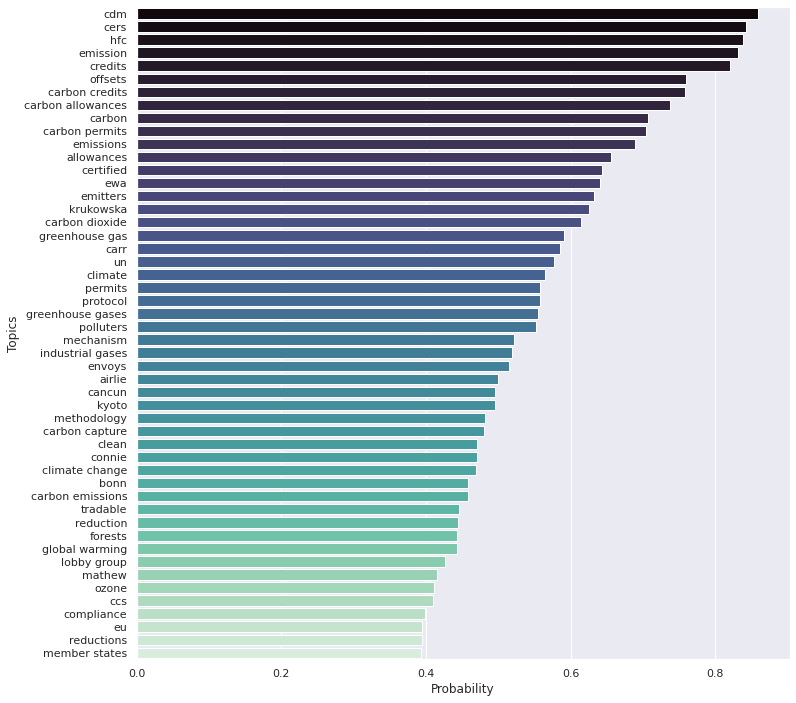

In [45]:
ax = sns.barplot(x="Probability", y="Topics", data=df, palette="mako")

I had not heard of terms like "cdm" and "cer" before running this. You can see how this way of searching can lead to discoverability. 

## Get semantically similar words (depends on your corpus)

In [48]:
words, word_scores = model.similar_words(keywords=["carbon emissions"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

emissions 0.8429154127995091
greenhouse gas 0.812901380663213
climate change 0.800138670759873
carbon 0.7958825416224186
greenhouse gases 0.7947150554389693
carbon dioxide 0.7887679251304487
global warming 0.7302628301832572
climate 0.6892445731410093
polluters 0.665999115432317
fossil fuels 0.6443340316015664
fossil fuel 0.6336541936296485
energy efficiency 0.6299370453376393
pollution 0.625831345027817
renewable sources 0.611094585783523
emission 0.6066935653045318
carbon capture 0.6054737256915552
renewable 0.5854746417676959
clean energy 0.5797872849330475
renewable energy 0.5693246076862032
polluter 0.555037448227361


From here you can see how this can help with discoverability, leading to other terms like "climate change", "greenhouse gas", "global warming"

## Using a document, search for similar documents

In [9]:
similar_docs = model.search_documents_by_documents([59965],5)

In [12]:
for doc in similar_docs[0]:
    print("-----------")
    print(doc)
    print("-----------")
    print()

-----------
  Climate Change Talks Bogged Down Over Financing, Carbon Limits, U.S. Says   B y   S t u a r t   B i g g s   2010-10-06T16:30:34Z    U.S. and Bolivian negotiators said climate talks in China are making little progress as issues including financing and carbon-emissions limits bog down envoys.  Efforts to reduce greenhouse gases in a global treaty to replace the 1997 Kyoto Protocol accord may splinter if no agreement is reached at the climate summit next month in Cancun, Mexico,  Jonathan Pershing , the U.S. deputy special envoy on climate change, said today in Tianjin.  “The consequences of not having an agreement after Cancun are something to worry about,” Pershing said in a news briefing. “It may mean that we don’t use this process exclusively going forward.”  Officials from about 175 governments are meeting in China to craft a climate treaty and replace emissions targets set by the Kyoto Protocol that expire at the end of 2012. Talks in Copenhagen broke down last year ov

As you can see, these documents are truly similar, about climate change, the UN as well as China. This can potentially be useful!

## Reduce number of topics
If, for some reason, you think that Top2Vec has created too many topics, and you have a number in mind, you can reduce the topics using the following function. 

In [ ]:
hierarchical_topic_reduction

## What else was happening around 2006-2010? iPhone? 

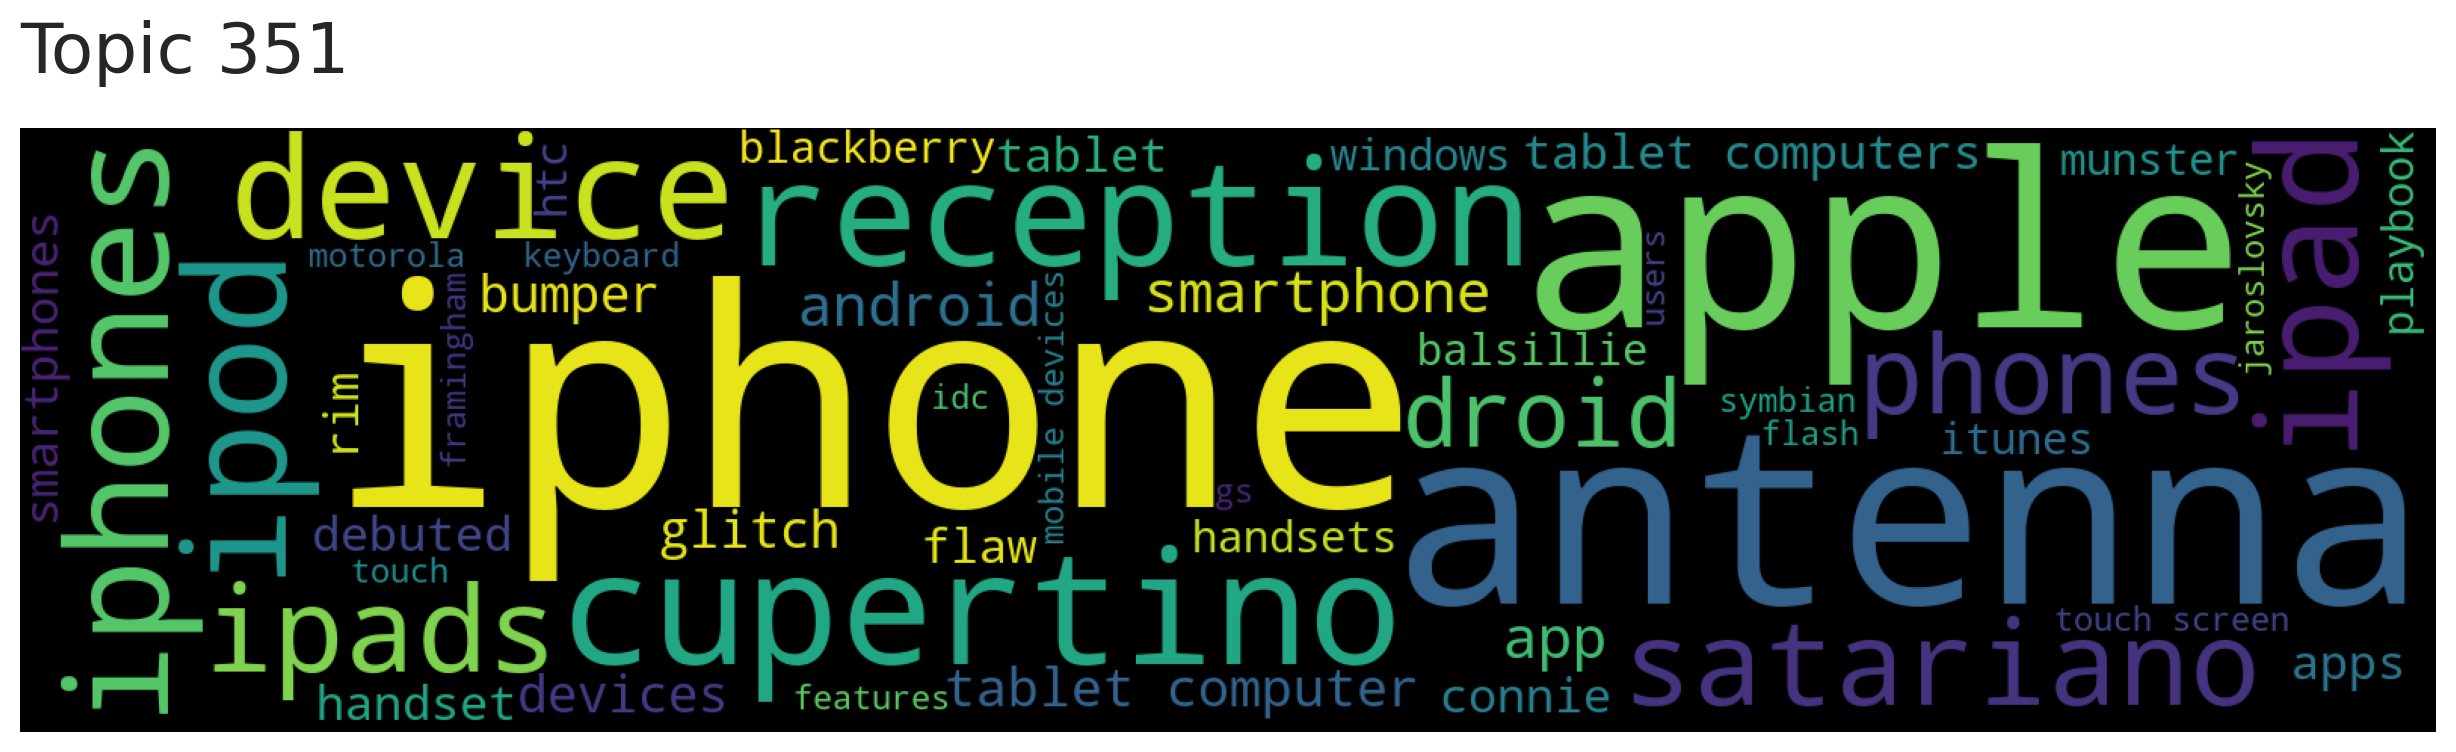

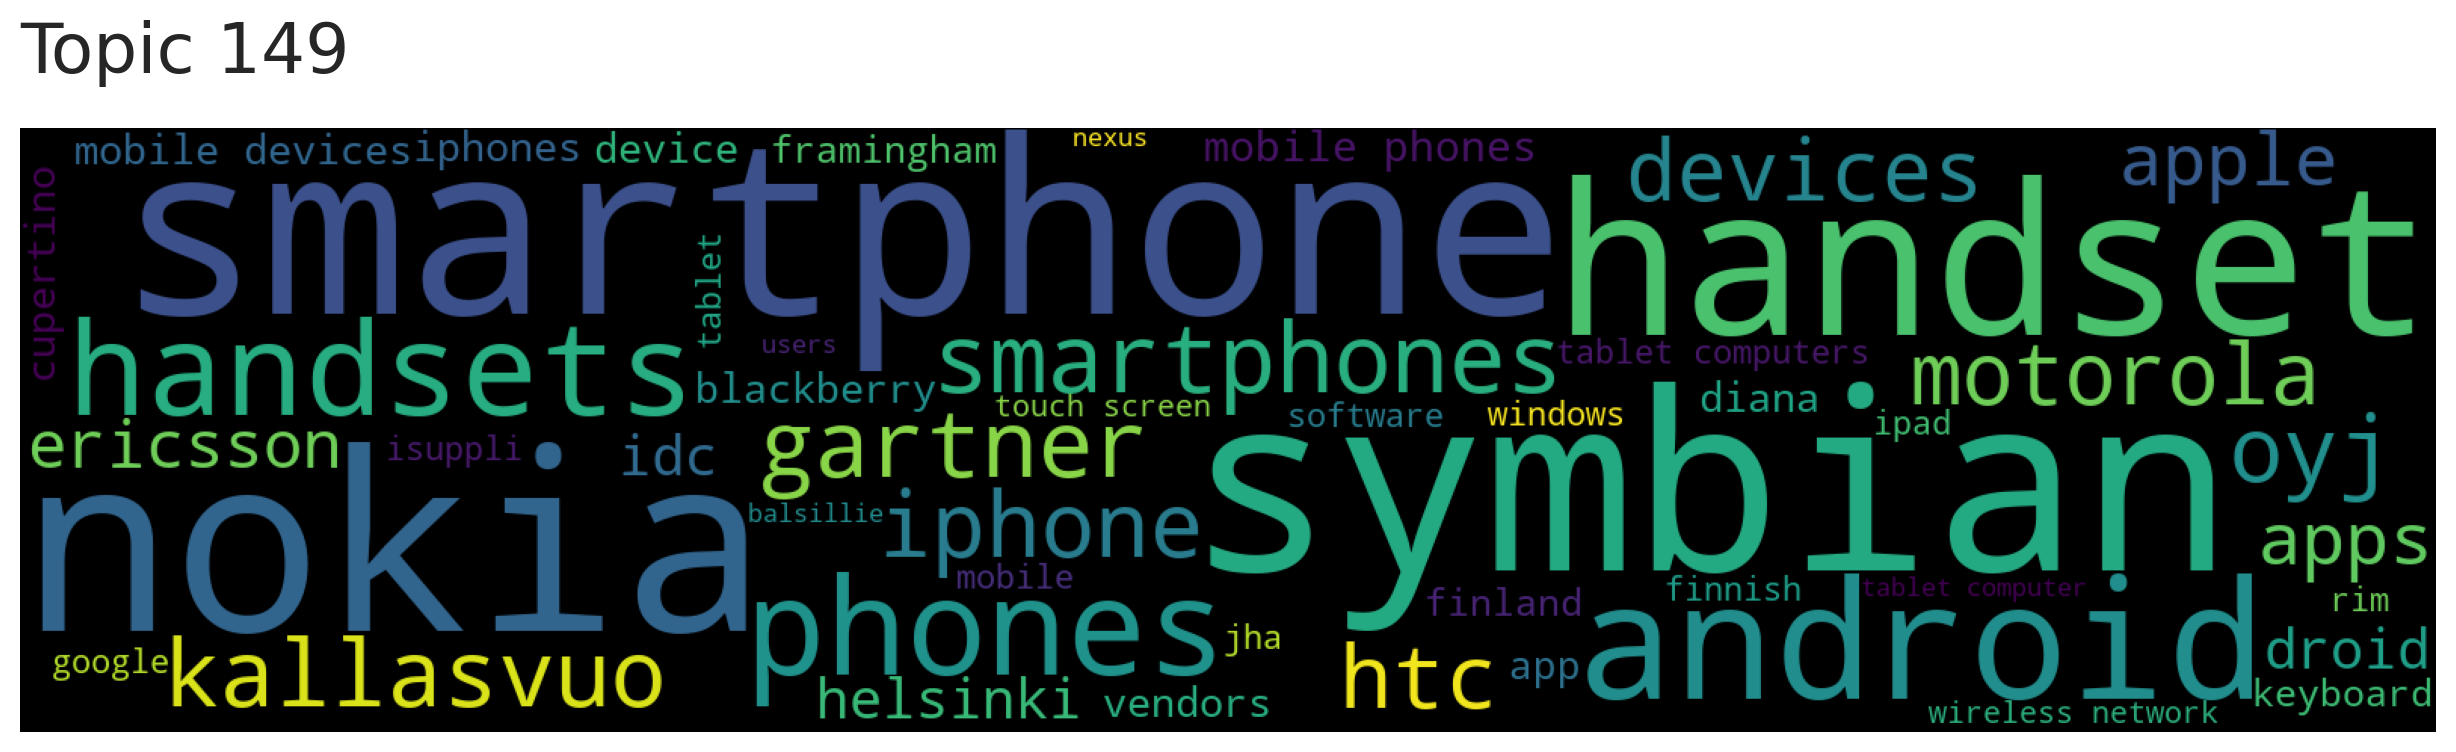

In [33]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["iphone"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

Looking at iphone, antenna, it reminds me of antennagate, the issue with iPhone 4 which Apple tried to explain away. 

In [32]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=351, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 28490, Score: 0.7436909079551697
-----------
  Apple  Working Our Butts Off' to Fix IPhone, Jobs Says   Rochelle Garner   2010-07-16T22:44:40Z                                        Apple Inc. ’s  Steve Jobs  said the company knew the iPhone 4 can lose reception when held a certain way and didn’t think it would be a major issue for users. He offered customers a free case to fix the flaw.    “We tested it   we knew that if you gripped it a certain way, bars would go down a little bit,”  Apple ’s chief executive officer said today at a press conference in Cupertino, California. “We didn’t think it would be a big problem because every smartphone has this problem.”    Apple, which scheduled the event after customers complained about losing signal strength, is “working our butts off” to address the glitch and will let dissatisfied buyers return phones for a full refund, Jobs said. He apologized to users affected by the issue, which some bloggers have called “Antennagate.”    Apple

Yep, true enough these articles surface regarding AntennaGate. 

## Find topics related to a single document

In [38]:
doc_topics = model.get_documents_topics([24725])
doc_topics


(array([351]),
 array([0.7320391], dtype=float32),
 array([['iphone', 'antenna', 'apple', 'cupertino', 'reception',
         'iphones', 'device', 'ipod', 'ipad', 'ipads', 'satariano',
         'phones', 'droid', 'smartphone', 'android', 'app',
         'tablet computer', 'bumper', 'glitch', 'devices',
         'tablet computers', 'tablet', 'flaw', 'handset', 'connie',
         'apps', 'rim', 'debuted', 'smartphones', 'blackberry', 'itunes',
         'htc', 'playbook', 'handsets', 'munster', 'balsillie', 'windows',
         'touch screen', 'users', 'mobile devices', 'gs', 'motorola',
         'keyboard', 'idc', 'jaroslovsky', 'features', 'touch', 'symbian',
         'flash', 'framingham']], dtype='<U25'),
 array([[0.7965329 , 0.7952906 , 0.7668712 , 0.73402476, 0.67376465,
         0.6311454 , 0.620656  , 0.6187631 , 0.60023344, 0.5828925 ,
         0.56542623, 0.5547726 , 0.5455624 , 0.53601056, 0.53519183,
         0.5282023 , 0.5275446 , 0.5097952 , 0.5018976 , 0.49615118,
         0

In [39]:
topic_names = doc_topics[2]
topic_probs = doc_topics[3]
df_topics = pd.DataFrame(topic_names).transpose().rename(columns={0 : "Topics"})
df_probs = pd.DataFrame(topic_probs).transpose().rename(columns={0 : "Probability"})
df = pd.concat([df_topics, df_probs], axis=1)

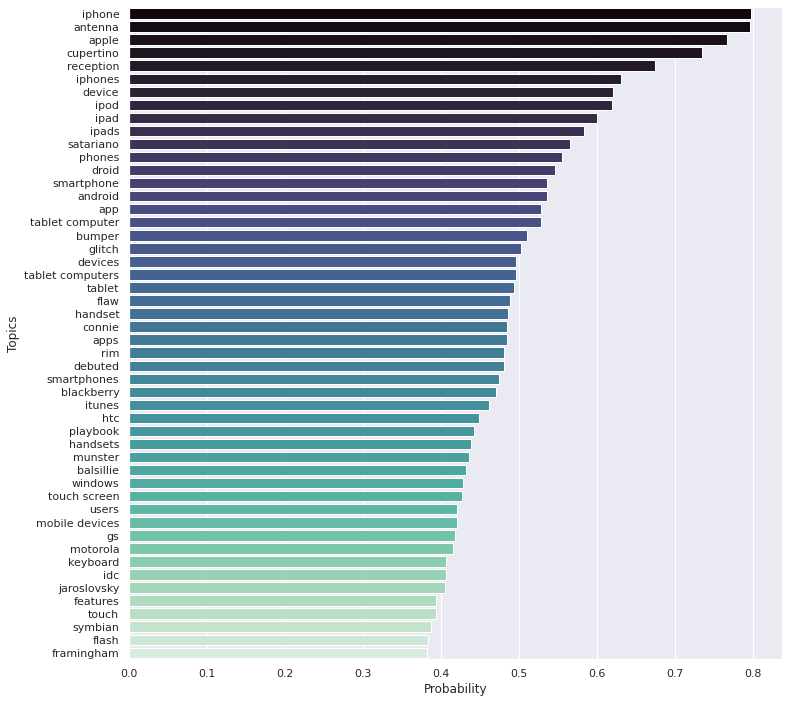

In [40]:
ax = sns.barplot(x="Probability", y="Topics", data=df, palette="mako")

What's similar to the iPhone?

In [12]:
words, word_scores = model.similar_words(keywords=["iphone"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

apple 0.9387393911379776
cupertino 0.8565267271680705
smartphone 0.823848159800425
iphones 0.8183176301579986
phones 0.8157816339580779
smartphones 0.802623967910772
android 0.798919690609675
ipad 0.7913624712072489
handset 0.7608987097132107
devices 0.7453261210729544
device 0.7448622692899163
handsets 0.7428050621589419
ipod 0.7373502811478383
droid 0.7117303284574937
ipads 0.703183757250268
tablet computer 0.695726490254172
app 0.6863217008103362
apps 0.6787270091314435
mobile devices 0.6750837270534501
tablet computers 0.670399701508698


## Get all topic data by the documents 

In [50]:
doc_topics = model.get_documents_topics([i for i in range(len(docs)) ]) # get all topics for all docs

In [51]:
doc_topics

(array([169, 224, 248, ..., 564,  88, 107]),
 array([0.31746086, 0.5790624 , 0.50371766, ..., 0.6152182 , 0.35058102,
        0.38210472], dtype=float32),
 array([['ford', 'dearborn', 'mulally', ..., 'assembly plant', 'sedan',
         'mpg'],
        ['viewers', 'nbc', 'idol', ..., 'cablevision', 'blackout',
         'network'],
        ['fsa', 'fortado', 'enforcement', ..., 'mckenna',
         'bonus payments', 'systemic'],
        ...,
        ['ira', 'savers', 'fasb', ..., 'precisely', 'generous',
         'moynihan'],
        ['rubles', 'micex', 'oao', ..., 'ustinova', 'abelsky',
         'anastasia'],
        ['francs', 'smi', 'swiss', ..., 'broader', 'alcon', 'hadfield']],
       dtype='<U25'),
 array([[0.80031025, 0.7746516 , 0.75906307, ..., 0.41614276, 0.413678  ,
         0.40765733],
        [0.75017494, 0.73593557, 0.71464723, ..., 0.40435475, 0.4034735 ,
         0.39758652],
        [0.8493948 , 0.57520074, 0.5057383 , ..., 0.32724798, 0.32646292,
         0.3256071 ],
 

## Get number of documents which have "wikileaks" as a topic, aggregated to month

In [82]:
import numpy as np
def find_topic_counts_by_month(term, dates, prob_criteria=0.65, normalize=False):
    found_topic_docs = []

    for doc_idx in range(len(docs)):
        if term in doc_topics[2][doc_idx]:
            arr_index = np.where(doc_topics[2][doc_idx] == term)
            if doc_topics[3][doc_idx][arr_index][0] > prob_criteria:
                found_topic_docs.append(doc_idx)
    
    found_idx_dates = [(idx, dates[idx]) for idx in found_topic_docs]
    df = pd.DataFrame(found_idx_dates)
    df = df.rename(columns={ 0 : "idx", 1: "date"})
    df['Datetime'] = pd.to_datetime(df['date'])
    df = df.set_index('Datetime')
    df[term] = 1
    df = df.drop(columns={ 'idx', 'date'})
    df = df.resample('M').sum()
    
    if normalize == True:
        df_dates = pd.DataFrame(dates)
        df_dates = df_dates.rename(columns={0: 'date'})
        df_dates['Datetime'] = pd.to_datetime(df_dates['date'])
        df_dates = df_dates.set_index('Datetime')
        df_dates = df_dates.drop(columns={ 'date'})
        df_dates['documents'] = 1
        df_dates = df_dates.resample('M').sum()
        df_joined = df.merge(df_dates, left_index=True, right_index=True)
        df_joined[term+'_normalized'] = df_joined[term] / df_joined['documents']
        return df_joined
    
    return df


In [87]:
df1 = find_topic_counts_by_month("wikileaks", dates)
#df2 = find_topic_counts_by_month("nokia", dates)
#df3 = find_topic_counts_by_month("iphone", dates)
#df4 = find_topic_counts_by_month("android", dates)
# df4 = find_topic_counts_by_month("android", dates)
# df5 = find_topic_counts_by_month("lehman", dates)
# df6 = find_topic_counts_by_month("iran", dates)
df_topic_counts = pd.concat([df1],axis=1) 

In [88]:
df_topic_counts = df_topic_counts['2010-01-31' :]

Normalize the documents with the topics against the total number of documents in those corresponding months. 

<AxesSubplot:xlabel='Datetime'>

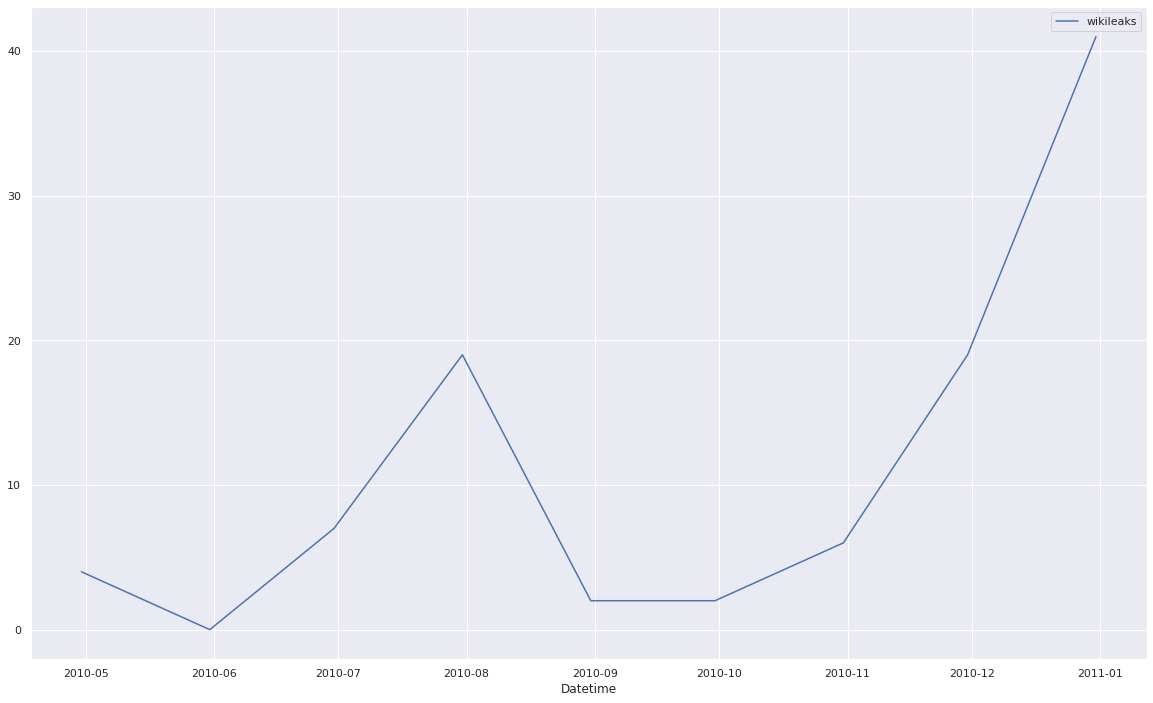

In [90]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot( data=df_topic_counts[['wikileaks']])

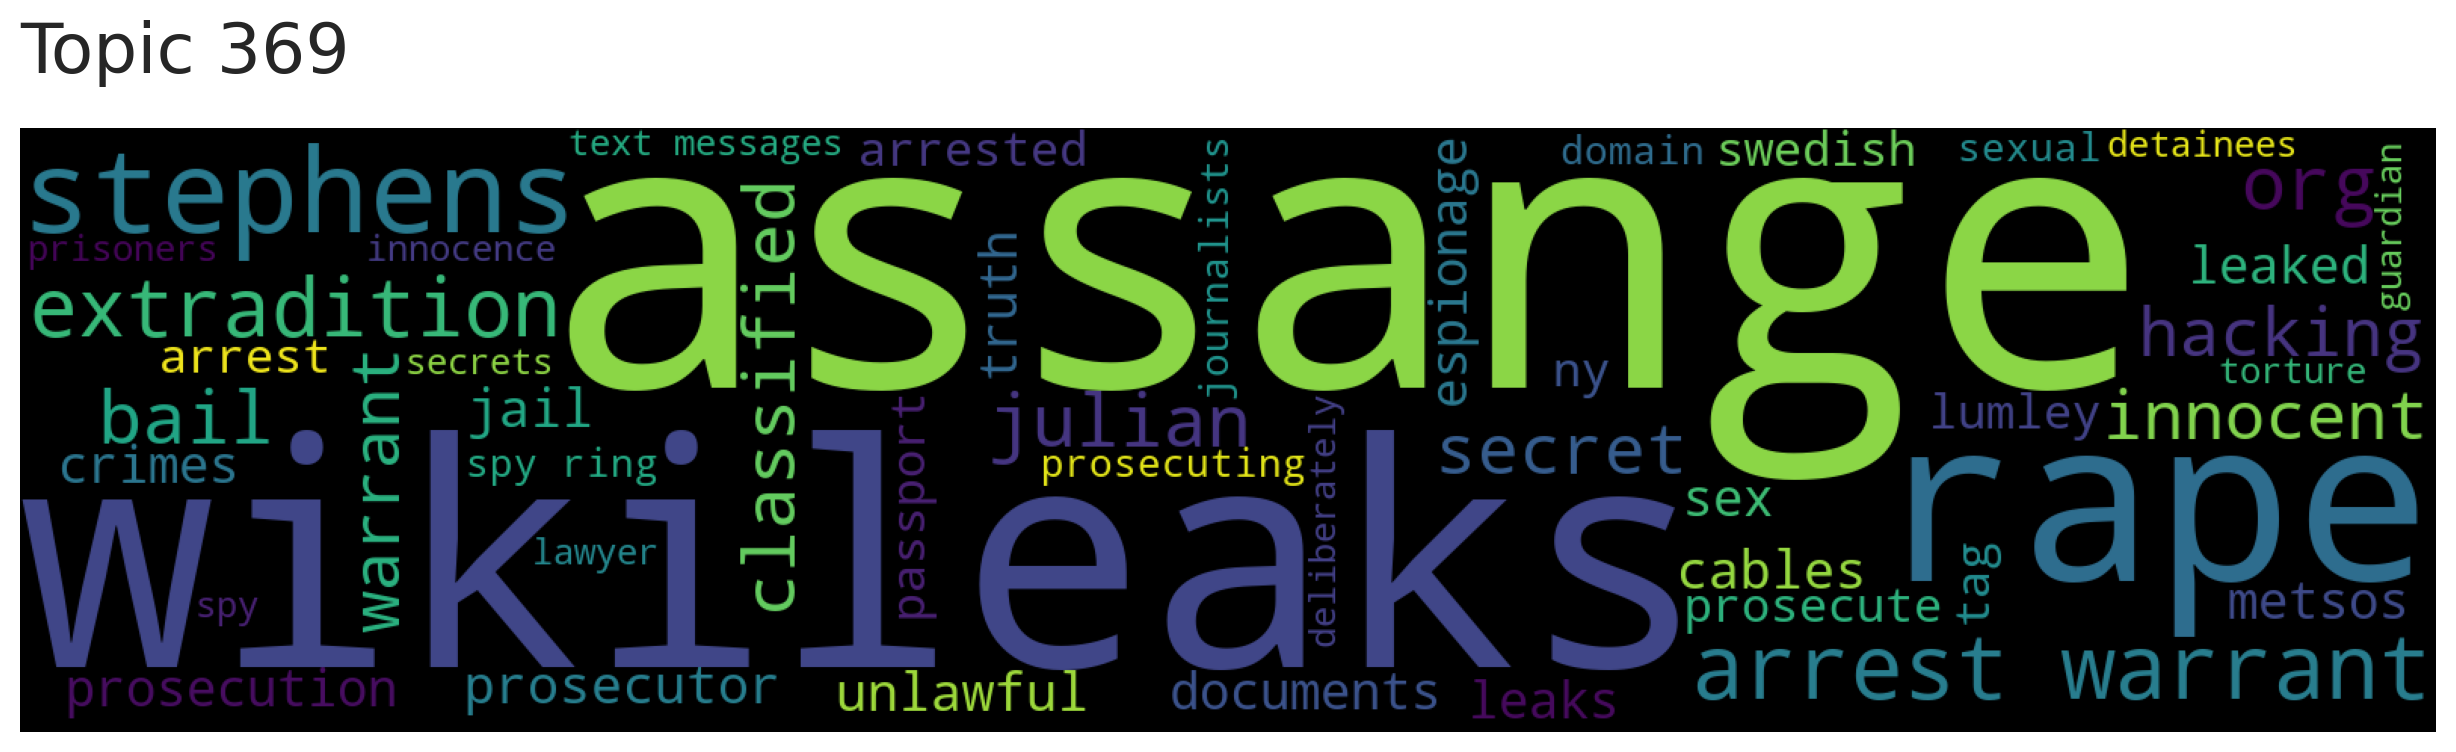

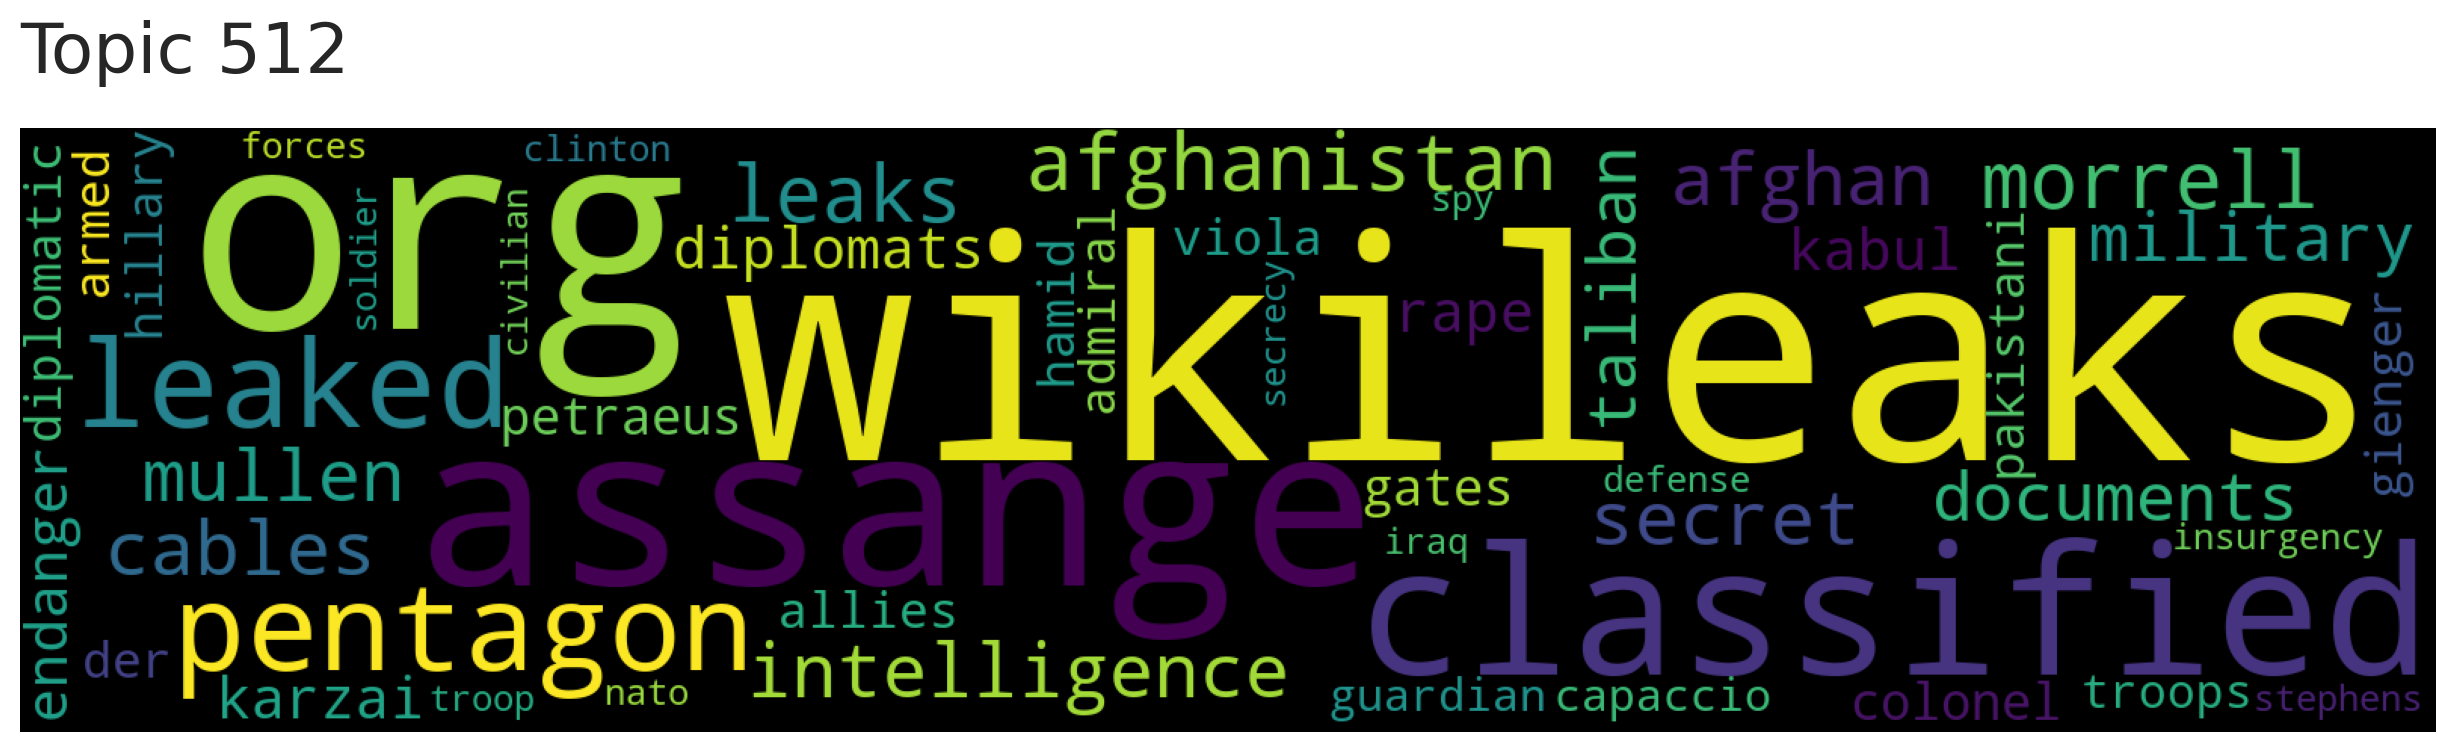

In [95]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["wikileaks"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [13]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["assange"], num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 35839, Score: 0.7786381244659424
-----------
  Wikileaks' Assange Must Remain in Custody Pending Appeal of Bail   B y   E r i k   L a r s o n   a n d   J a m e s   L u m l e y   2010-12-14T18:10:06Z    Julian Assange , founder of the WikiLeaks website that published secret U.S. documents, was granted bail by the U.K. judge overseeing his extradition fight with Sweden over allegations of rape and molestation.  Assange won the bail request after agreeing to post bail of 240,000 pounds ($378,480), turn in his passport and wear an electronic tag. He must remain in prison until U.K. prosecutors complete an appeal of the ruling on behalf of Sweden, Judge Howard Riddle ruled today in London.  Assange, 39, turned himself in to U.K. authorities after Swedish police issued a warrant on one count of unlawful coercion, two counts of sexual molestation and one count of rape. WikiLeaks gained prominence after it released U.S. military documents, including a video of a July 2007 helicopter 

By looking at the topic keywords, I could infer that "assange" is within the Wikileaks topic. This allowed me to dive in to Assange's bail news. Nice!